# SMS Spam Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/NLP/SMS_classifier/datasets/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [17]:
data.sample(5)

,label,message
4927,ham,"Oh yes, why is it like torture watching england?"
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...
1990,ham,The basket's gettin full so I might be by tonight
2398,ham,Neshanth..tel me who r u?
3526,ham,I not free today i haf 2 pick my parents up to...


In [18]:
data['message'][5228]

'PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04'

# Steps to follow :
1. Data Cleansing
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation

## Data Cleansing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isna().sum()

label      0
message    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
data['label'] = encoder.fit_transform(data['label'])

In [ ]:
data.sample(5)

,label,message
1395,0,R we still meeting 4 dinner tonight?
3648,0,"Hey babe, my friend had to cancel, still up fo..."
5410,0,"Daddy, shu shu is looking 4 u... U wan me 2 te..."
4247,0,Well welp is sort of a semiobscure internet thing
4168,0,Are you at work right now ?


In [ ]:
data.duplicated().sum()

403

In [ ]:
data = data.drop_duplicates(keep='first')

## EDA

In [ ]:
values = data['label'].value_counts()

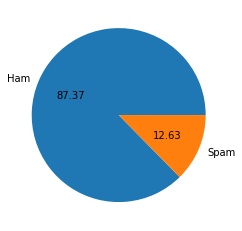

In [ ]:
plt.pie(values, labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['char_counts'] = data['message'].apply(len)

In [ ]:
data['word_counts'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
data['sent_counts'] = data['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
data.rename(
    columns = {'characters':'chars'}
)

,label,message,char_counts,word_counts,sent_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
data.head()

,label,message,char_counts,word_counts,sent_counts
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data.describe()

,label,char_counts,word_counts,sent_counts
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,79.344554,18.423873,1.969627
std,0.332253,58.437457,13.304791,1.443078
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,119.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [ ]:
# Ham
data[data['label']==0][['char_counts', 'word_counts', 'sent_counts']].describe()

,char_counts,word_counts,sent_counts
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.101417,1.822852
std,56.715046,13.488402,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
# Spam
data[data['label']==1][['char_counts', 'word_counts', 'sent_counts']].describe()

,char_counts,word_counts,sent_counts
count,653.000000,653.000000,653.000000
mean,137.704441,27.569678,2.984686
std,29.821348,6.880006,1.495313
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


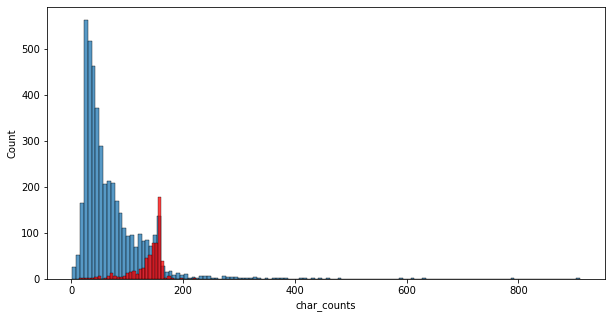

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['label']==0]['char_counts'])
sns.histplot(data[data['label']==1]['char_counts'], color='red')

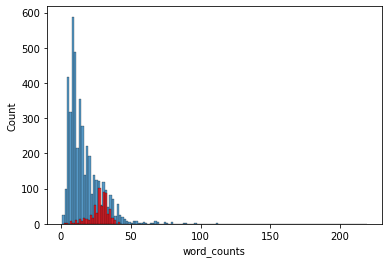

In [ ]:
sns.histplot(data[data['label']==0]['word_counts'])
sns.histplot(data[data['label']==1]['word_counts'], color='red')

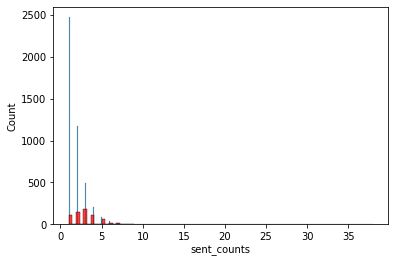

In [ ]:
sns.histplot(data[data['label']==0]['sent_counts'])
sns.histplot(data[data['label']==1]['sent_counts'], color='red')

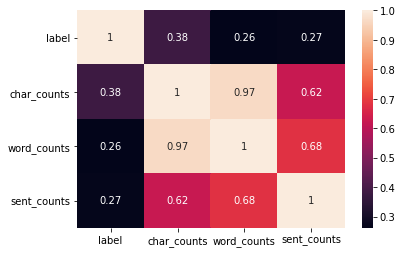

In [ ]:
sns.heatmap(data.corr(), annot=True)

## Text Preprocessing
- Lower Case
- Removing Special Characters
- Removing Stopwords
- Stemming


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
stem = PorterStemmer()

In [ ]:
def text_transform(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]',' ',text)
  text = nltk.word_tokenize(text)
  text = ' '.join([stem.stem(word) for word in text if word not in set(stop_words)])
  return text

In [ ]:
text_transform(data['message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
data['transformed_text'] = data['message'].apply(text_transform)

In [ ]:
data.head()

,label,message,char_counts,word_counts,sent_counts,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=1, background_color='white')

In [ ]:
all_spams = wc.generate(' '.join(data[data['label']==1]['message']))

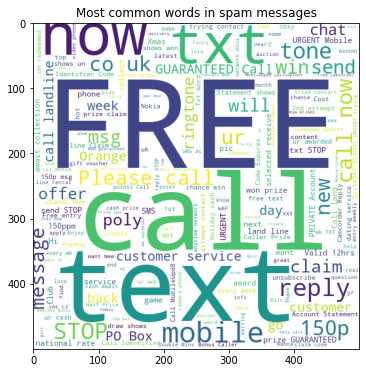

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Most common words in spam messages')
plt.imshow(all_spams)
plt.show()

In [ ]:
spams = data[data['label']==1]['transformed_text'].tolist()

In [ ]:
from collections import Counter

In [ ]:
words_bag = []
for words in spams:
  for word in words.split():
    words_bag.append(word)

In [ ]:
Counter(words_bag).most_common(30)

[('call', 346),
 ('free', 197),
 ('p', 158),
 ('u', 157),
 ('txt', 152),
 ('text', 129),
 ('mobil', 121),
 ('ur', 119),
 ('stop', 116),
 ('repli', 104),
 ('claim', 98),
 ('prize', 85),
 ('www', 83),
 ('min', 78),
 ('get', 75),
 ('tone', 73),
 ('cash', 65),
 ('servic', 65),
 ('new', 64),
 ('uk', 63),
 ('send', 62),
 ('nokia', 62),
 ('msg', 61),
 ('urgent', 58),
 ('win', 57),
 ('c', 56),
 ('award', 56),
 ('contact', 56),
 ('week', 55),
 ('phone', 53)]

In [ ]:
x = pd.DataFrame(Counter(words_bag).most_common(30))[0]
y = pd.DataFrame(Counter(words_bag).most_common(30))[1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


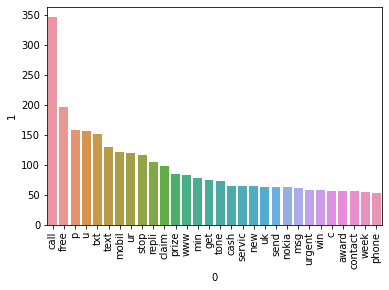

In [ ]:
sns.barplot(x,y)
plt.xticks(rotation='vertical')
plt.show()

## Modeling


In [ ]:
data.head()

,label,message,char_counts,word_counts,sent_counts,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = data['transformed_text']
y = data['label'].values

In [ ]:
X = tfidf.fit_transform(X).toarray()

In [ ]:
X.shape

(5169, 6292)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

0.8810444874274661
0.5021645021645021


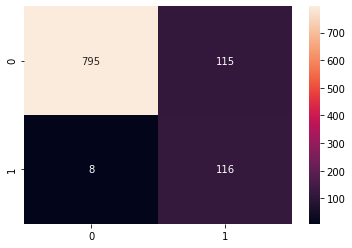

In [ ]:
gnb.fit(X_train, y_train)
y_preds = gnb.predict(X_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d')

0.971953578336557
1.0


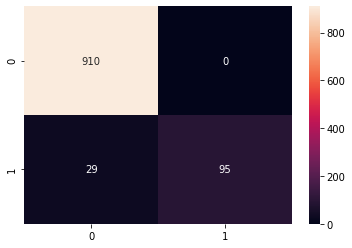

In [ ]:
mnb.fit(X_train, y_train)
y_preds = mnb.predict(X_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d')

0.9806576402321083
0.956140350877193


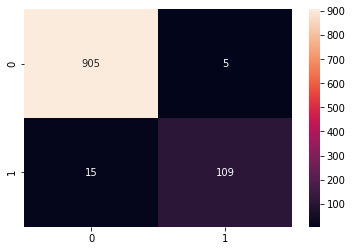

In [ ]:
bnb.fit(X_train, y_train)
y_preds = bnb.predict(X_test)
print(accuracy_score(y_test, y_preds))
print(precision_score(y_test, y_preds))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, fmt='d')

## Evaluation

In [ ]:
X = data['transformed_text']

In [ ]:
tfidf2 = TfidfVectorizer(max_features=2500)
X = tfidf2.fit_transform(X).toarray()

In [ ]:
a,b,c,d = train_test_split(X, y, test_size=0.2)

0.8539651837524178
0.43946188340807174


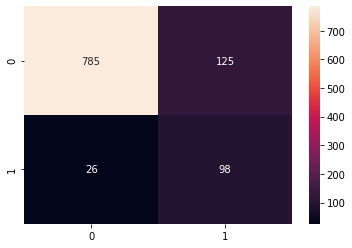

In [ ]:
gnb.fit(a, c)
y_preds = gnb.predict(b)
print(accuracy_score(d, y_preds))
print(precision_score(d, y_preds))
sns.heatmap(confusion_matrix(d, y_preds), annot=True, fmt='d')

0.9777562862669246
1.0


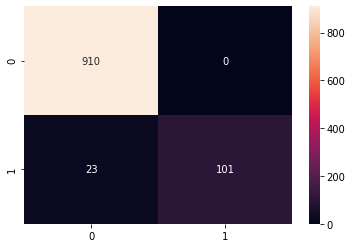

In [ ]:
mnb.fit(a, c)
y_preds = mnb.predict(b)
print(accuracy_score(d, y_preds))
print(precision_score(d, y_preds))
sns.heatmap(confusion_matrix(d, y_preds), annot=True, fmt='d')

0.9845261121856866
0.9576271186440678


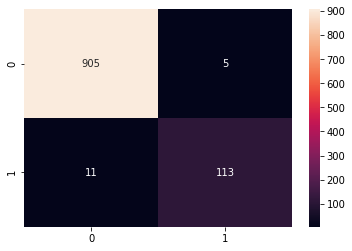

In [ ]:
bnb.fit(a, c)
y_preds = bnb.predict(b)
print(accuracy_score(d, y_preds))
print(precision_score(d, y_preds))
sns.heatmap(confusion_matrix(d, y_preds), annot=True, fmt='d')

We are using TFIDF vectorizer with max_feature 2500 and MultinomialNB

# Pickling the model and vectorizer

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf2, open('vectorizer.pkl', 'wb'))

In [ ]:
pickle.dump(mnb, open('model.pkl','wb'))